<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.1/blob/main/POS_A3_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Me
##Analysis of Survey Data for POS
##Exploratory Analysis
##Using R

## History
A2-v1 : Using "Without POS Survey" as input (from earlier working in Python)

A2-v2 : Going back to the original file (SurveyData20201003 - A2) to have everything in R

A2-v3 : Completing the Data Cleaning up. Checking unique values of various variables to see if there are any issues to be fixed there

A2-v4 : Data Cleanup completed. CSV written for subsequent analysis 'Without_POS_CleanData.csv'

A3-v1 : Getting into Exploratory Analysis based on CSV created in A2-v4

A3-v2 : WIP

A3-v3 : WIP

A3-v4 : First Iteration of Analysis Completed

A3-v5 : Creating Graphs for Presentation (Moving to Janitor / tabyl) to create pivots

A3-v6 : WIP

A3-v7 : WIP

A3-v8 : WIP

In [25]:
# library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [26]:
#install.packages("janitor")
library(janitor)

In [27]:
library(scales)

In [28]:
# reading in input File
df_master = read_csv('/content/Without_POS_CleanData.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  EMP_CODE = col_double()
)

See spec(...) for full column specifications.



In [29]:
# printing DF
print(as_tibble(df_master))

# A tibble: 317 x 20
   EMP_CODE ORG_NAME ORG_CITY EMP_PER_OUTLET ORG_TYPE EXPANSION RECONCILIATION
      <dbl> <chr>    <chr>    <chr>          <chr>    <chr>     <chr>         
 1    33409 Al syed… Islamab… Less than 5    Single … Yes       Yes           
 2    36750 Sohaib … Islamab… Less than 5    Single … Yes       Yes           
 3    34729 Inam co… Rawalpi… Less than 5    Single … No        No            
 4    33409 Reco tr… Islamab… Less than 5    Multipl… Yes       Yes           
 5    33409 Archee … Islamab… Less than 5    Single … Yes       Yes           
 6    36750 Zaki Ge… Rawalpi… Less than 5    Single … Yes       Yes           
 7    35918 Xyz      Karachi  Less than 5    Single … Yes       Yes           
 8    36750 Haseeb … Islamab… Less than 5    Single … Yes       Yes           
 9    36731 Eithsha… islamab… Less than 5    Single … Yes       Yes           
10    36585 adeel s… Rawalpi… Less than 5    Single … Yes       No            
# … with 307 more rows, and 13 

In [30]:
## inspect the data
str(df_master)

tibble [317 × 20] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ EMP_CODE             : num [1:317] 33409 36750 34729 33409 33409 ...
 $ ORG_NAME             : chr [1:317] "Al syed medical store" "Sohaib Computer" "Inam cosmetic" "Reco tradors" ...
 $ ORG_CITY             : chr [1:317] "Islamabad" "Islamabad" "Rawalpindi" "Islamabad" ...
 $ EMP_PER_OUTLET       : chr [1:317] "Less than 5" "Less than 5" "Less than 5" "Less than 5" ...
 $ ORG_TYPE             : chr [1:317] "Single Outlet" "Single Outlet" "Single Outlet" "Multiple outlets" ...
 $ EXPANSION            : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ RECONCILIATION       : chr [1:317] "Yes" "Yes" "No" "Yes" ...
 $ WHY_NO_POS           : chr [1:317] "I am happy with how my business is managed presently" "Don’t want to spend money, I am happy with how my business is managed presently, Tax purposes" "I am happy with how my business is managed presently" "Tax purposes" ...
 $ LANGUAGE_PREF        : chr [1:317] "Both, English & Urdu" "Bo

In [31]:
df_1 = df_master

df_1 hereon

In [32]:
df_1 %>% glimpse()

Rows: 317
Columns: 20
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [33]:
colnames(df_1)

[1] "EMP_CODE"              "ORG_NAME"              "ORG_CITY"             
 [4] "EMP_PER_OUTLET"        "ORG_TYPE"              "EXPANSION"            
 [7] "RECONCILIATION"        "WHY_NO_POS"            "LANGUAGE_PREF"        
[10] "PAYMENT_PREF"          "PAYMENT_AMOUNT"        "INTERNET_ACCESS"      
[13] "INTERNET_PROVIDER"     "INTERNET_DISRUPTION"   "DEPLOYMENT_PREF"      
[16] "BUSINESS_IMPROVEMENT"  "STORE_CUST_DATA"       "OFFER_DISCOUNTS"      
[19] "COMPETITIVE_ADVANTAGE" "ORG_CITY_CLEAN"

Using "tabyl" from Janitor to make freq table

In [34]:
t1 <- df_1 %>%
  tabyl(ORG_CITY_CLEAN) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 
  
t1

ORG_CITY_CLEAN,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
RWP,118,37.2,37.2,37.2%,(118)
ISL,101,31.9,31.9,31.9%,(101)
KHI,97,30.6,30.6,30.6%,(97)
MNS,1,0.3,0.3,0.3%,(1)


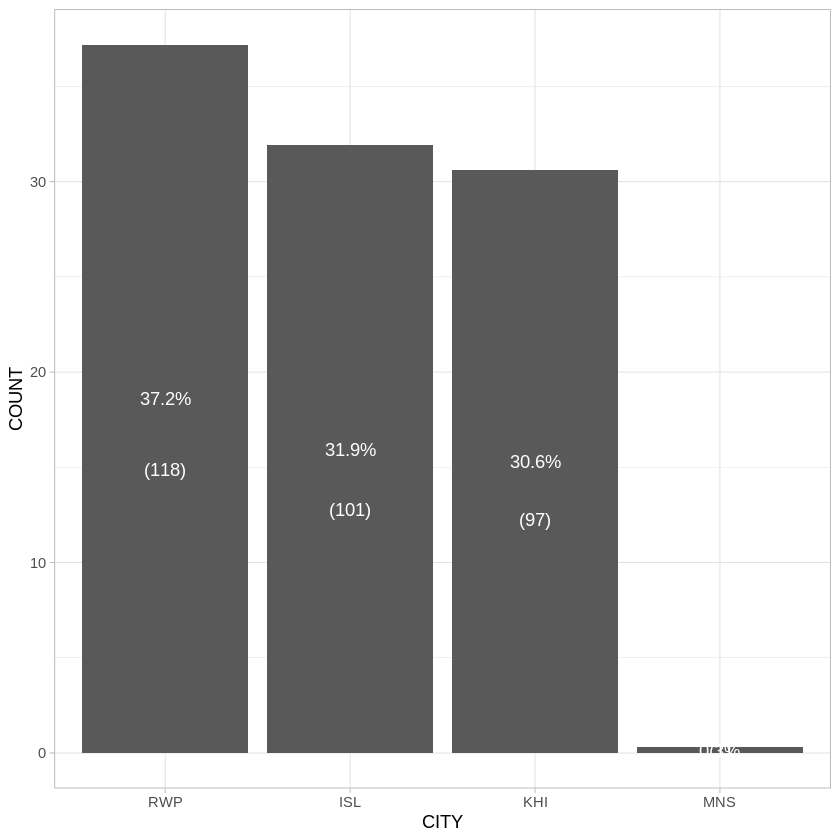

In [35]:
positions <- c("RWP","ISL", "KHI", "MNS")

g <- ggplot(t1, aes(x = ORG_CITY_CLEAN,y=PERCENTAGE)) + scale_x_discrete(limits = positions)
# Number of cases in each city:
g <- g + geom_col()

p.labs <- g + labs(x = "CITY", y = "COUNT")
p.labs <- p.labs + geom_text(aes(label=LABEL),position=position_stack(0.5),colour='white')
p.labs <- p.labs + geom_text(aes(label=C_LABEL),position=position_stack(0.4),colour='white')

p.labs <- p.labs + theme_light()
p.labs

In [36]:
distinct(df_1, EMP_PER_OUTLET)

EMP_PER_OUTLET
<chr>
Less than 5
More than 5 but less than 10
More than 10


In [37]:
t2 <- df_1 %>%
  tabyl(EMP_PER_OUTLET) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 

t2

EMP_PER_OUTLET,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Less than 5,274,86.4,86.4,86.4%,(274)
More than 5 but less than 10,27,8.5,8.5,8.5%,(27)
More than 10,16,5.0,5.0,5%,(16)


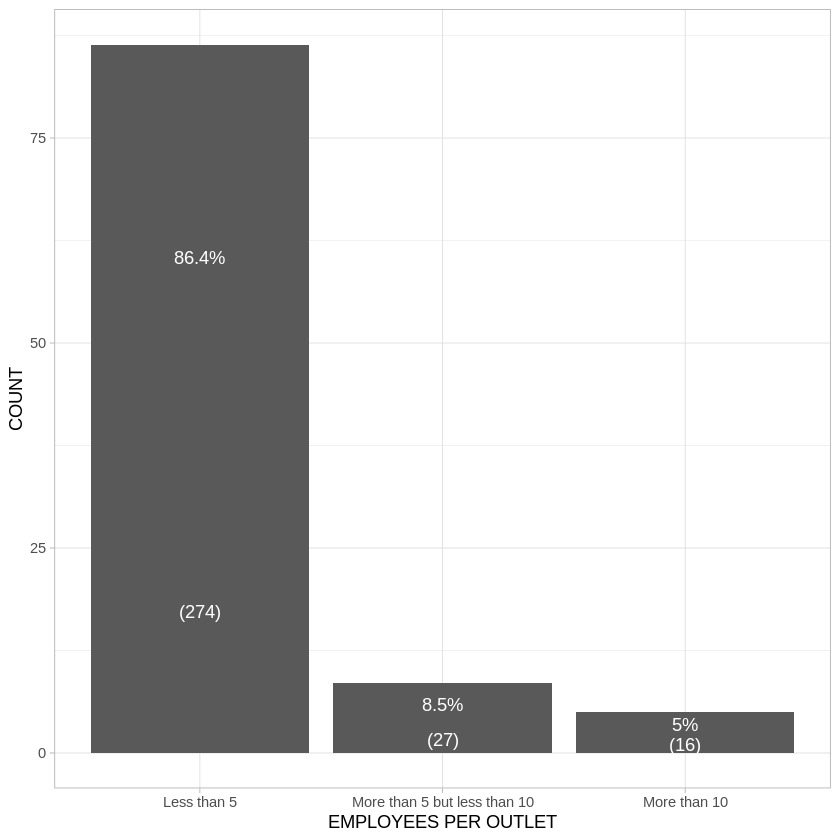

In [38]:
positions <- c("Less than 5"
,"More than 5 but less than 10"
,"More than 10")


g2 <- ggplot(t2, aes(x = EMP_PER_OUTLET,y=PERCENTAGE)) + scale_x_discrete(limits = positions)
# Number of cases in each city:
g2 <- g2 + geom_col()

p.labs2 <- g2 + labs(x = "EMPLOYEES PER OUTLET", y = "COUNT")
p.labs2 <- p.labs2 + geom_text(aes(label=LABEL),position=position_stack(0.7),colour='white')
p.labs2 <- p.labs2 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

p.labs2 <- p.labs2 + theme_light()
p.labs2

In [39]:
# recode EMP_PER_OUTLET

df_2 = df_1 %>%
  mutate(ORG_SIZE = recode(EMP_PER_OUTLET, "Less than 5" = "<5",
  "More than 5 but less than 10" = "5To10",
  "More than 10" = "10+"))

df_2 hereon

In [40]:
distinct(df_2,ORG_CITY_CLEAN)

ORG_CITY_CLEAN
<chr>
ISL
RWP
KHI
MNS


In [41]:
# recode ORG_CITY_CLEAN (Merge ISL and RWP)

df_2 = df_2 %>%
  mutate(ORG_REGION = recode(ORG_CITY_CLEAN, "ISL" = "NORTH",
  "RWP" = "NORTH",
  "KHI" = "SOUTH"))

In [42]:
distinct(df_2, ORG_TYPE)

ORG_TYPE
<chr>
Single Outlet
Multiple outlets
Chain


In [43]:
t3 <- df_1 %>%
  tabyl(ORG_TYPE) %>%
  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 

t3

ORG_TYPE,COUNT,percent,PERCENTAGE,LABEL,C_LABEL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Single Outlet,285,89.9,89.9,89.9%,(285)
Multiple outlets,27,8.5,8.5,8.5%,(27)
Chain,5,1.6,1.6,1.6%,(5)


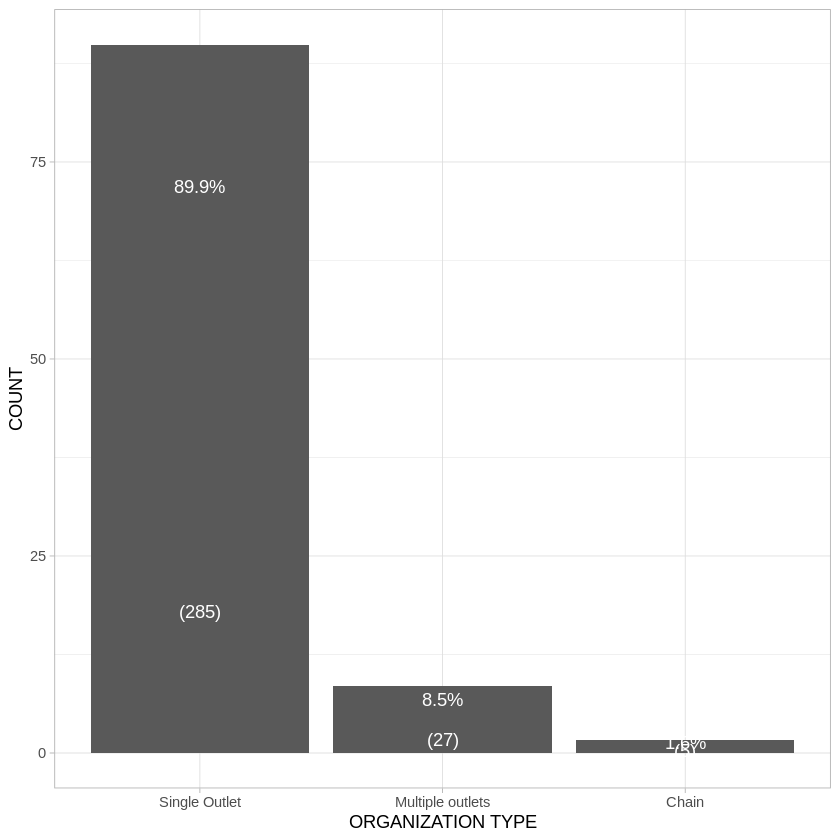

In [44]:
positions <- c("Single Outlet"
,"Multiple outlets"
,"Chain")

g3 <- ggplot(t3, aes(x = ORG_TYPE,y=PERCENTAGE)) + scale_x_discrete(limits = positions)
# Number of cases in each city:
g3 <- g3 + geom_col()

p.labs3 <- g3 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
p.labs3 <- p.labs3 + geom_text(aes(label=LABEL),position=position_stack(0.8),colour='white')
p.labs3 <- p.labs3 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

p.labs3 <- p.labs3 + theme_light()
p.labs3

In [45]:
nrow(df_2)

[1] 317

In [46]:
glimpse(df_2)

Rows: 317
Columns: 22
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 33409, 36750, 35918…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Yearly )",…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "No", "Yes", "No", "Yes", "No…
$ INTERNET_PROVIDER     <chr> 

In [47]:
# remove single entry with MNS
df_2 <- df_2 %>%
  filter(ORG_CITY_CLEAN != "MNS")

In [48]:
nrow(df_2)

[1] 316

In [49]:
library(knitr)

In [50]:

#t4 <- df_2 %>%
#  tabyl(ORG_TYPE,ORG_SIZE,ORG_REGION) %>%
#  adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
#  mutate(PERCENTAGE = as.numeric(percent)) %>%
#  arrange(desc(PERCENTAGE)) %>% # descending %>%
#  rename(COUNT = n) # renaming column 

#t4

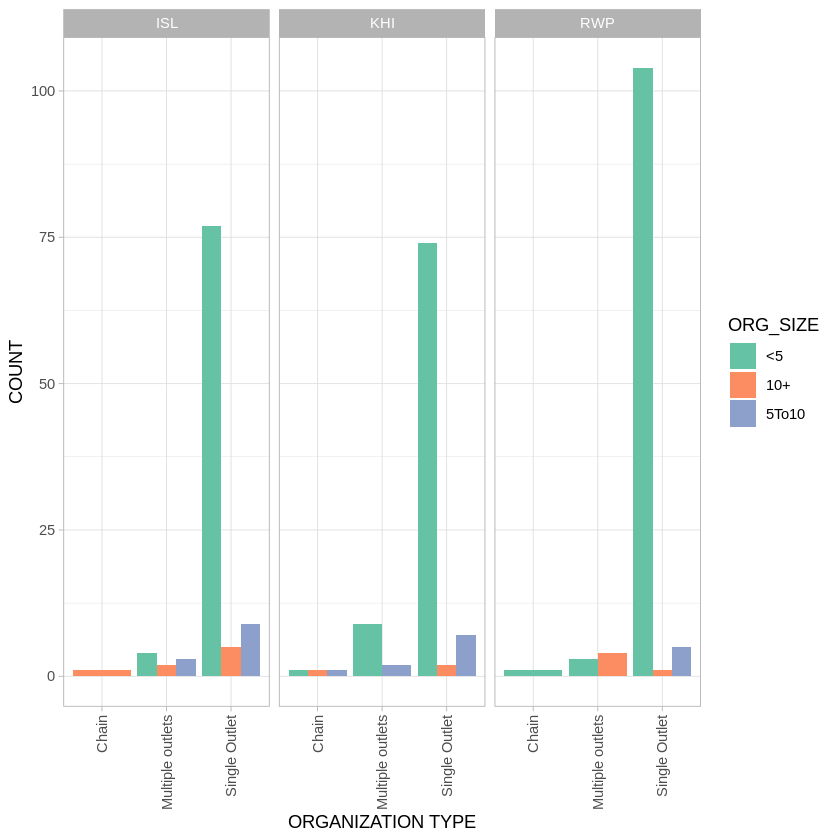

In [51]:
# Stacked Bar Chart

positions <- c("<5"
,"5To10"
,"10+")

g1 <- df_2 %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    #facet_wrap(~ ORG_REGION)
    facet_wrap(~ ORG_CITY_CLEAN)

#p.labs <- g + labs(x = "ORG TYPE", y = "COUNT")
#p.labs <- g1 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
#p.labs

# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

In [52]:
# Single Outlet less than 5 as one segment vs the rest
df_2 = df_2 %>%
  mutate(TEMP_SEG = recode(ORG_TYPE, "Chain" = "SINGLE OUTLET",
  "Multiple outlets" = "SINGLE OUTLET",
  "Single Outlet" = "SINGLE OUTLET"))

#glimpse(df_2)


In [53]:
library(knitr)

In [54]:
df_2 %>%
    filter(ORG_TYPE != "Single Outlet") %>%
    group_by(ORG_TYPE, ORG_SIZE, ORG_REGION)%>%
    summarise(n=n())%>%
    spread(ORG_TYPE, n)%>%
    kable()

`summarise()` regrouping output by 'ORG_TYPE', 'ORG_SIZE' (override with `.groups` argument)





|ORG_SIZE |ORG_REGION | Chain| Multiple outlets|
|:--------|:----------|-----:|----------------:|
|<5       |NORTH      |     1|                7|
|<5       |SOUTH      |     1|                9|
|10+      |NORTH      |     1|                6|
|10+      |SOUTH      |     1|               NA|
|5To10    |NORTH      |    NA|                3|
|5To10    |SOUTH      |     1|                2|

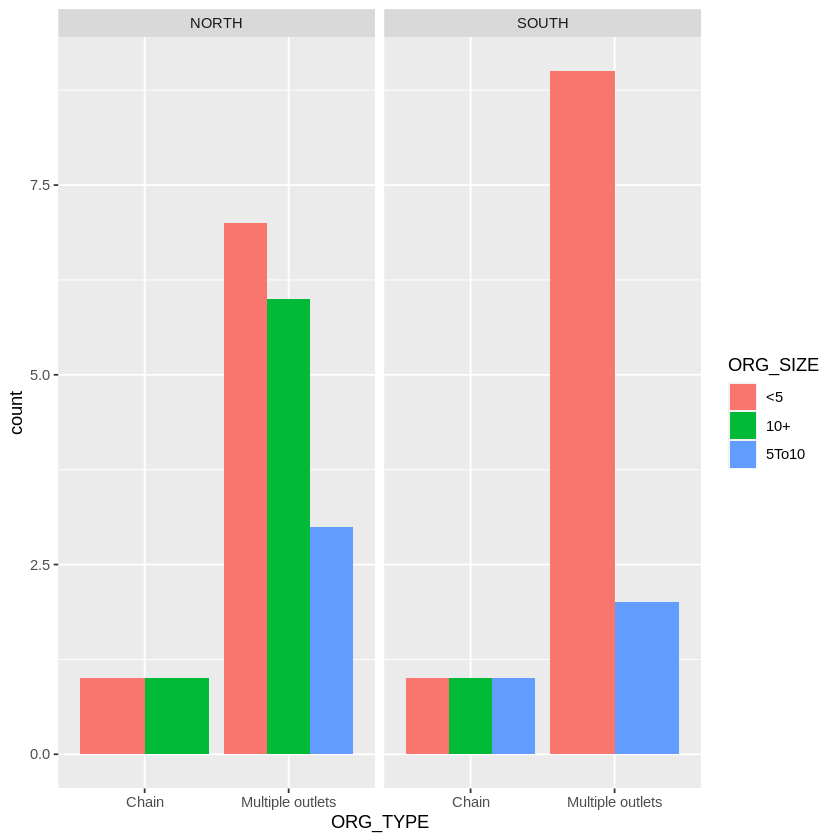

In [55]:
df_2 %>%
    filter(ORG_TYPE != "Single Outlet") %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    facet_wrap(~ ORG_REGION)

In [56]:
df_2 %>%
    filter(ORG_TYPE == "Single Outlet") %>%
    group_by(ORG_TYPE, ORG_SIZE, ORG_REGION)%>%
    summarise(n=n())%>%
    spread(ORG_TYPE, n)%>%
    kable()

`summarise()` regrouping output by 'ORG_TYPE', 'ORG_SIZE' (override with `.groups` argument)





|ORG_SIZE |ORG_REGION | Single Outlet|
|:--------|:----------|-------------:|
|<5       |NORTH      |           181|
|<5       |SOUTH      |            74|
|10+      |NORTH      |             6|
|10+      |SOUTH      |             2|
|5To10    |NORTH      |            14|
|5To10    |SOUTH      |             7|

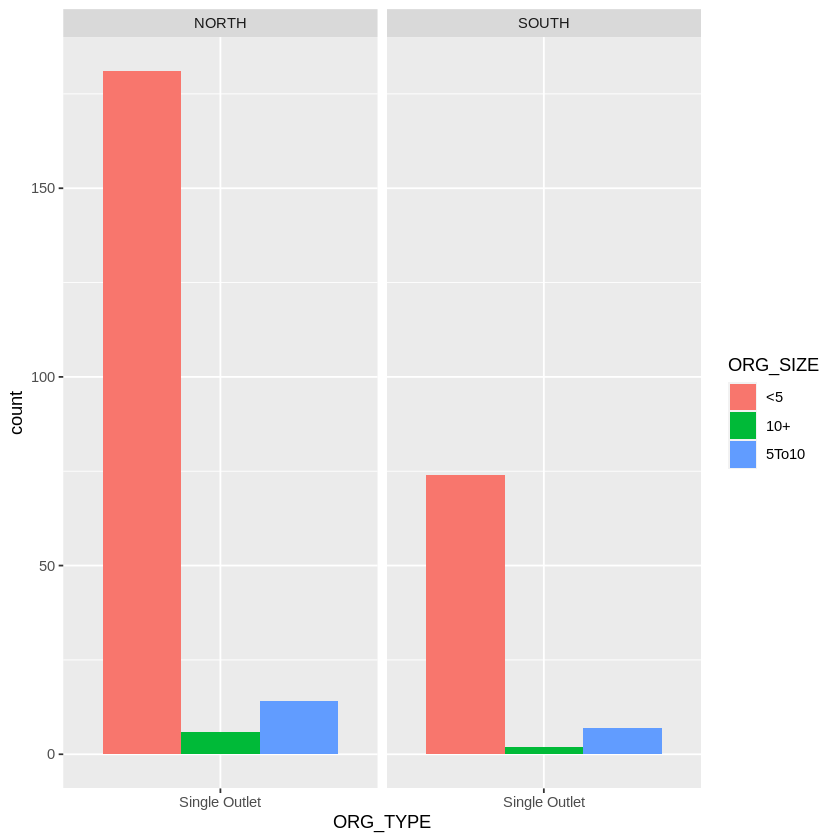

In [57]:
df_2 %>%
    filter(ORG_TYPE == "Single Outlet") %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    facet_wrap(~ ORG_REGION)

In [58]:
df_single <- df_2 %>%
    filter(ORG_TYPE == "Single Outlet")

df_single hereon

In [59]:
df_single %>%
    filter(ORG_SIZE != "<5") %>%
    group_by(ORG_TYPE, ORG_SIZE, ORG_REGION)%>%
    summarise(n=n())%>%
    spread(ORG_TYPE, n)%>%
    kable()

`summarise()` regrouping output by 'ORG_TYPE', 'ORG_SIZE' (override with `.groups` argument)





|ORG_SIZE |ORG_REGION | Single Outlet|
|:--------|:----------|-------------:|
|10+      |NORTH      |             6|
|10+      |SOUTH      |             2|
|5To10    |NORTH      |            14|
|5To10    |SOUTH      |             7|

In [60]:
df_single %>%
    filter(ORG_SIZE != "<5") %>%
    group_by(ORG_TYPE, ORG_SIZE, ORG_REGION)%>%
    summarise(n=n())%>%
    mutate(prop=n/sum(n))%>%
    #subset(select=c("class","cyl","prop"))%>%   #drop the frequency value
    spread(ORG_TYPE, prop)%>%
    kable()

`summarise()` regrouping output by 'ORG_TYPE', 'ORG_SIZE' (override with `.groups` argument)





|ORG_SIZE |ORG_REGION |  n| Single Outlet|
|:--------|:----------|--:|-------------:|
|10+      |NORTH      |  6|     0.7500000|
|10+      |SOUTH      |  2|     0.2500000|
|5To10    |NORTH      | 14|     0.6666667|
|5To10    |SOUTH      |  7|     0.3333333|

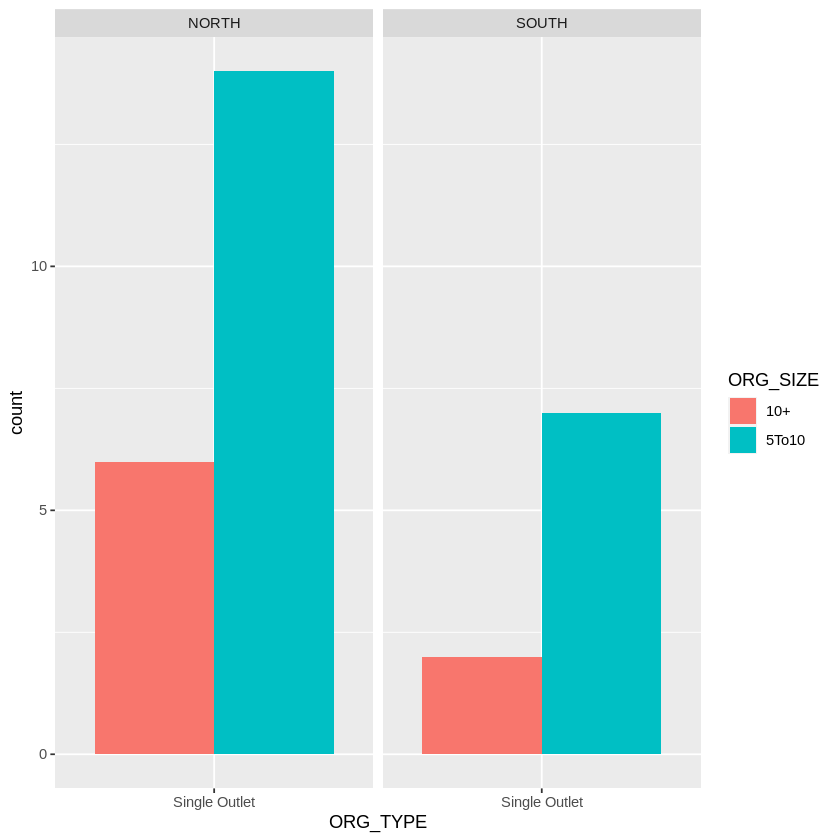

In [61]:
df_single %>%
    filter(ORG_SIZE != "<5") %>%
    ggplot(aes(x = ORG_TYPE)) +
    geom_bar(aes(fill = ORG_SIZE), position = "dodge") +
    facet_wrap(~ ORG_REGION)

All Analysis hereon is for the segment:
ORG_TYPE == Single_Outlet
AND
ORG_SIZE == <5


In [62]:
df_single_5 <- df_single %>%
    filter(ORG_SIZE == "<5")

In [63]:
nrow(df_single_5)

[1] 255

In [64]:
nrow(df_single)

[1] 284

In [65]:
nrow(df_2)

[1] 316

In [66]:
nrow(df_1)

[1] 317

In [67]:
255/317

[1] 0.8044164

In [68]:
glimpse(df_single_5)

Rows: 255
Columns: 23
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

In [69]:
df_single_5 %>%
    #filter(ORG_SIZE != "<5") %>%
    group_by(EXPANSION)%>%
    summarise(n=n())%>%
    mutate(prop=n/sum(n))%>%
    #subset(select=c("class","cyl","prop"))%>%   #drop the frequency value
    spread(EXPANSION, prop)%>%
    kable()

`summarise()` ungrouping output (override with `.groups` argument)





|   n|        No|       Yes|
|---:|---------:|---------:|
|  18| 0.0705882|        NA|
| 237|        NA| 0.9294118|

In [ ]:
adorn_pct_formatting(affix_sign = FALSE) %>% # if you do not want percentage sign, affix_sign = FALSE
  mutate(PERCENTAGE = as.numeric(percent),
         LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
         C_LABEL = paste("(",n,")",sep="")) %>%
  arrange(desc(PERCENTAGE)) %>% # descending %>%
  rename(COUNT = n) # renaming column 

In [109]:
t3 <- df_single_5 %>%
  tabyl(ORG_CITY_CLEAN,EXPANSION) %>%
  adorn_percentages("row") %>%
  adorn_pct_formatting(digits = 2) #%>% # if you do not want percentage sign, affix_sign = FALSE
  #mutate(PERCENTAGE = as.numeric(percent),
  #       LABEL = paste(round(PERCENTAGE,2), "%", sep=""),
  #       C_LABEL = paste("(",n,")",sep="")) %>%
  #arrange(desc(PERCENTAGE)) %>% # descending %>%
  #rename(COUNT = n) # renaming column 

t3

ORG_CITY_CLEAN,No,Yes
<chr>,<chr>,<chr>
ISL,1.30%,98.70%
KHI,12.33%,87.67%
RWP,6.80%,93.20%


In [94]:
glimpse(t3)

Rows: 2
Columns: 4
$ EXPANSION <chr> "No", "Yes"
$ ISL       <dbl> 1, 76
$ KHI       <dbl> 9, 64
$ RWP       <dbl> 7, 96


In [100]:
#spread(t3,)

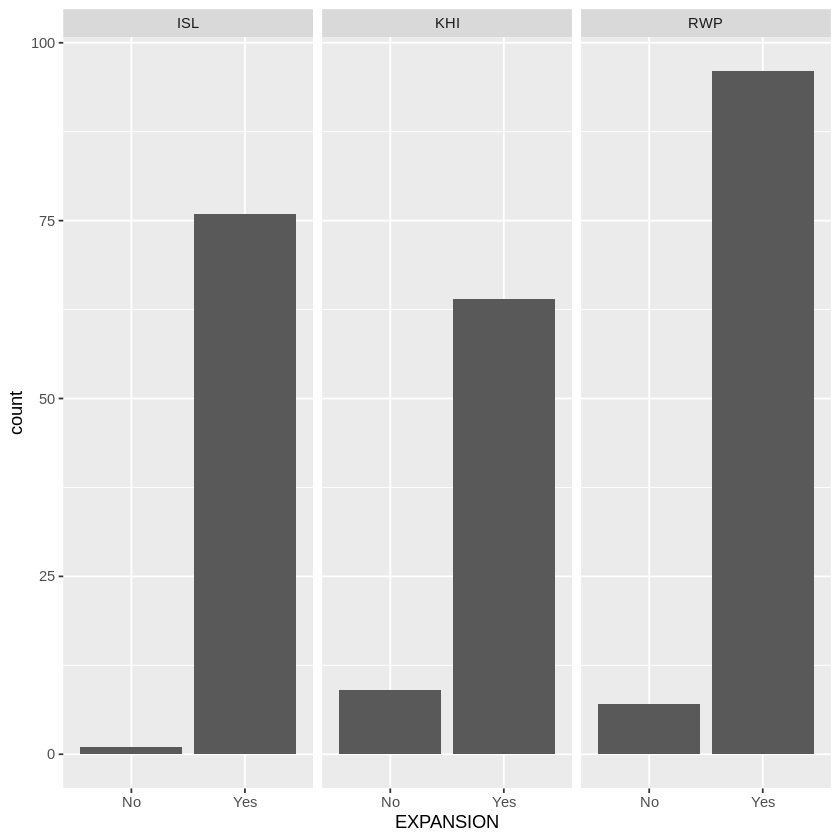

In [110]:
g10 <- df_single_5 %>%
  ggplot(aes(x = EXPANSION)) + 
  geom_bar() 

g10 <- g10 + 
  facet_wrap(~ ORG_CITY_CLEAN)

g10

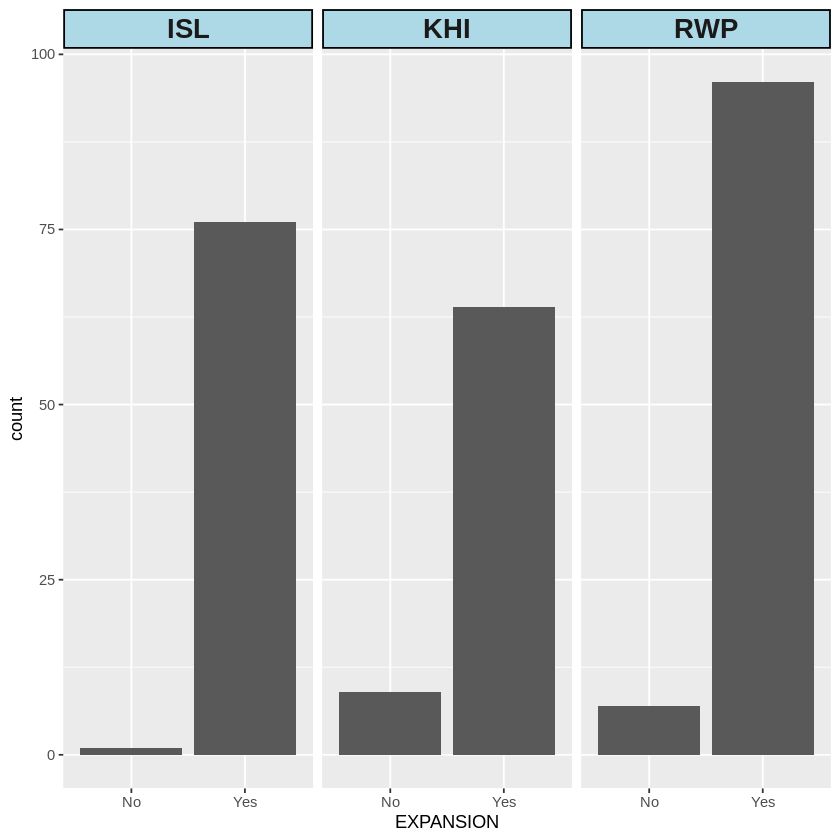

In [112]:
g11 <- g10 + theme(
    strip.text = element_text(face = "bold", size = rel(1.5)),
    strip.background = element_rect(fill = "lightblue", colour = "black", size = 1)
  )

g11

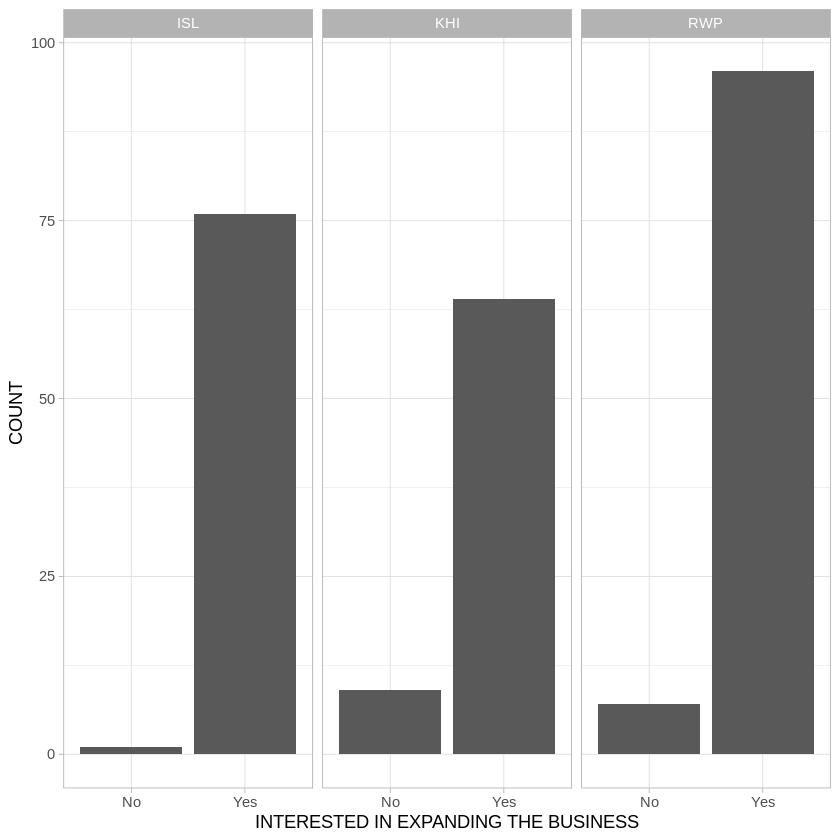

In [111]:
# bars are too little to add data labels
g1 <- g10 + labs(x = "INTERESTED IN EXPANDING THE BUSINESS", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
#g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

In [ ]:
g1 <- g1 + geom_text(aes(label=C_LABEL),position=position_stack(0.2),colour='white')

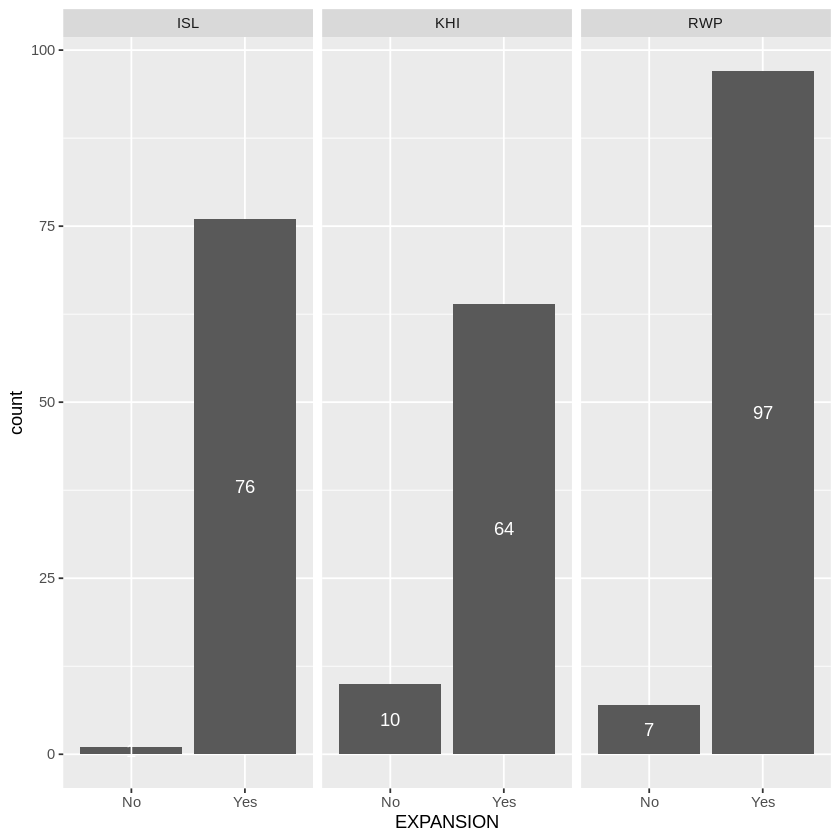

In [70]:
g10 <- df_single_5 %>%
  ggplot(aes(x = EXPANSION)) + 
  geom_bar() +
  #facet_wrap(~ ORG_REGION) +
  facet_wrap(~ ORG_CITY_CLEAN)

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs


# bars are too little to add data labels
g1 <- g1 + labs(x = "ORGANIZATION TYPE", y = "COUNT")
g1 <- g1 + scale_fill_brewer(palette = "Set2") 
g1 <- g1 + theme_light()
g1 <- g1 + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
g1

Too much hassle



https://sebastiansauer.github.io/percentage_plot_ggplot2_V2/

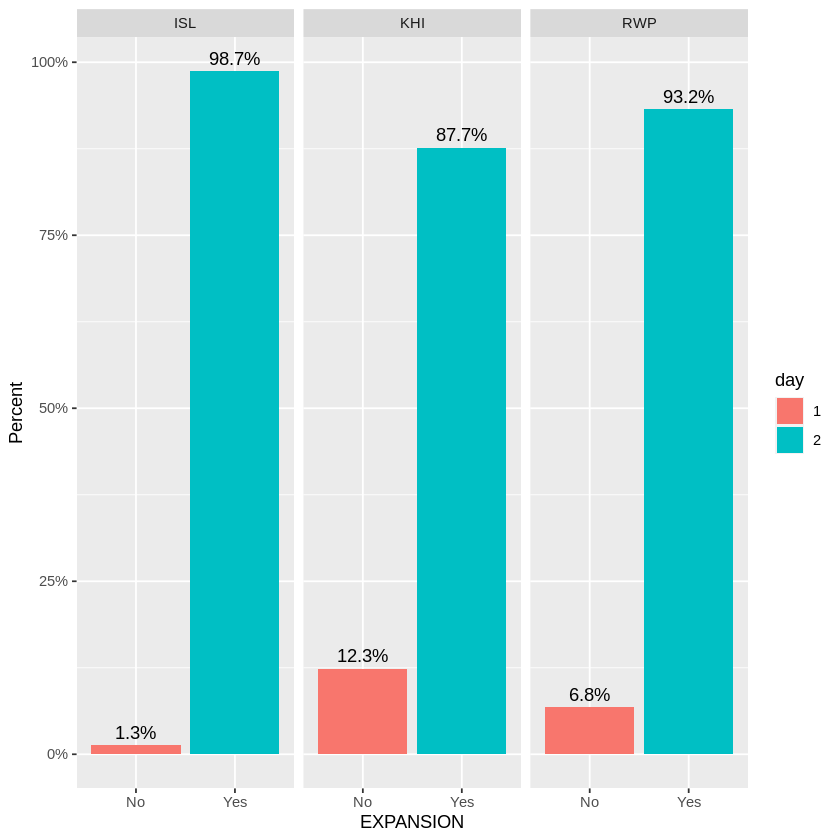

In [113]:
ggplot(df_single_5, aes(x= EXPANSION,  group=ORG_CITY_CLEAN)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(y = "Percent", fill="day") +
    facet_grid(~ORG_CITY_CLEAN) +
    scale_y_continuous(labels = scales::percent)

In [71]:
df_single_5 %>%
    #filter(ORG_SIZE != "<5") %>%
    group_by(RECONCILIATION)%>%
    summarise(n=n())%>%
    mutate(prop=n/sum(n))%>%
    #subset(select=c("class","cyl","prop"))%>%   #drop the frequency value
    spread(RECONCILIATION, prop)%>%
    kable()

`summarise()` ungrouping output (override with `.groups` argument)





|   n|        No|       Yes|
|---:|---------:|---------:|
| 111| 0.4352941|        NA|
| 144|        NA| 0.5647059|

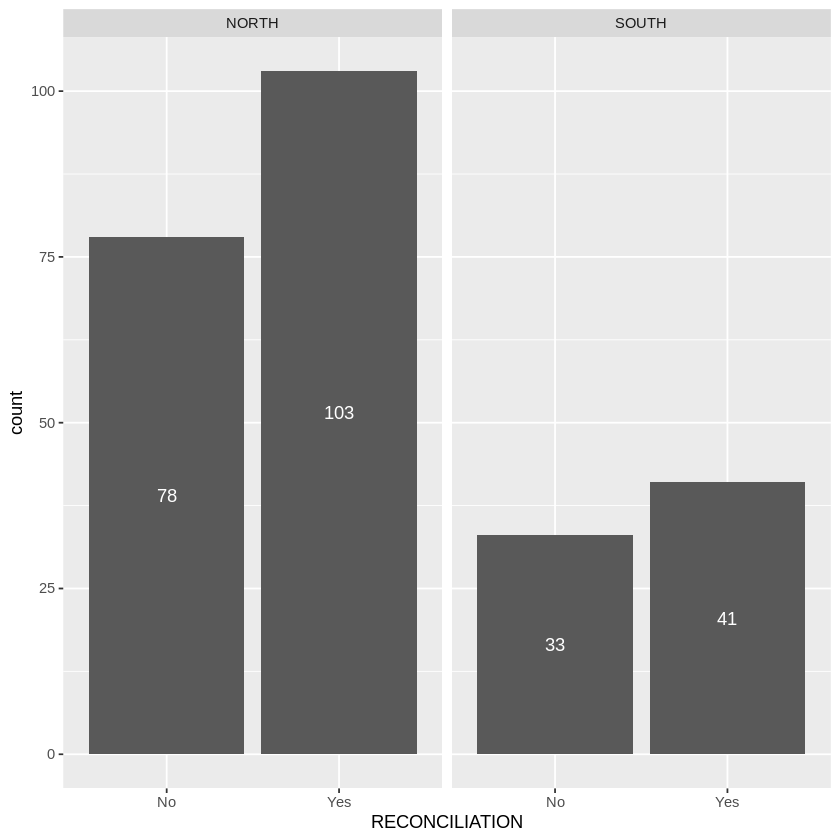

In [72]:
g11 <- df_single_5 %>%
  ggplot(aes(x = RECONCILIATION)) + 
  geom_bar()  +
  facet_wrap(~ ORG_REGION)

p.labs <- g11 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

In [73]:
df_single_5 %>%
    #filter(ORG_SIZE != "<5") %>%
    group_by(LANGUAGE_PREF)%>%
    summarise(n=n())%>%
    mutate(prop=n/sum(n))%>%
    #subset(select=c("class","cyl","prop"))%>%   #drop the frequency value
    spread(LANGUAGE_PREF, prop)%>%
    kable()

`summarise()` ungrouping output (override with `.groups` argument)





|   n| Both, English & Urdu|   English| Other: (Article base)| Other: (I am not educated)|      Urdu|
|---:|--------------------:|---------:|---------------------:|--------------------------:|---------:|
|   1|                   NA|        NA|             0.0039216|                  0.0039216|        NA|
|  42|                   NA|        NA|                    NA|                         NA| 0.1647059|
|  97|                   NA| 0.3803922|                    NA|                         NA|        NA|
| 114|            0.4470588|        NA|                    NA|                         NA|        NA|

In [74]:
#unique(df_single_5[LANGUAGE_PREF])

In [75]:
glimpse(df_single_5)

Rows: 255
Columns: 23
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

In [76]:
# recode LANGUAGE_PREF

df_single_5 = df_single_5 %>%
  mutate(LANGUAGE_PREF_RECODE = recode(LANGUAGE_PREF, "Both, English & Urdu" = "BOTH",
  "English" = "ENGLISH",
  "Urdu" = "URDU"))

In [77]:
# remove garbage from LANGUAGE_PREF
df_single_5 <- df_single_5 %>%
  filter(LANGUAGE_PREF_RECODE == "BOTH" | LANGUAGE_PREF_RECODE == "ENGLISH" | LANGUAGE_PREF_RECODE == "URDU" )

In [78]:
distinct(df_single_5,LANGUAGE_PREF_RECODE)

LANGUAGE_PREF_RECODE
<chr>
BOTH
ENGLISH
URDU


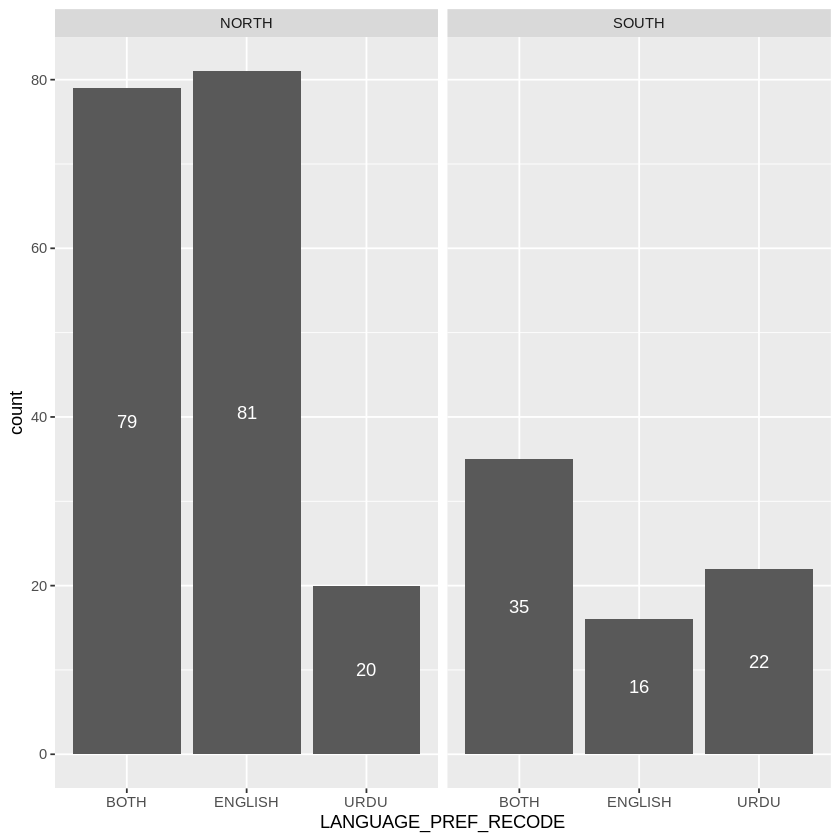

In [79]:
g11 <- df_single_5 %>%
  ggplot(aes(x = LANGUAGE_PREF_RECODE)) + 
  geom_bar()  +
  facet_wrap(~ ORG_REGION)

p.labs <- g11 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

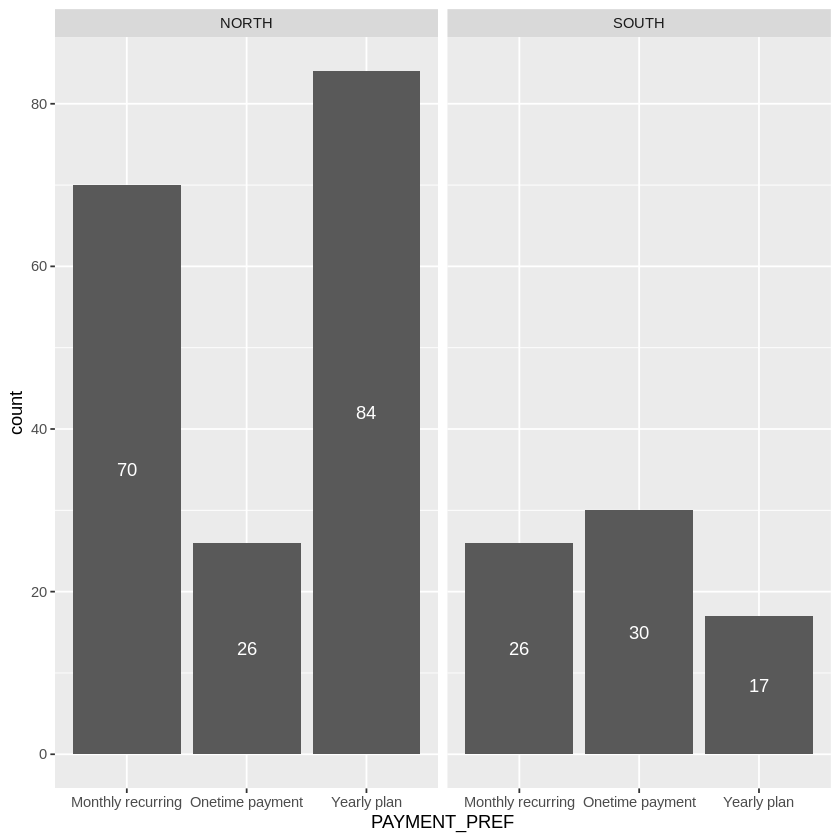

In [80]:
g11 <- df_single_5 %>%
  ggplot(aes(x = PAYMENT_PREF)) + 
  geom_bar()  +
  facet_wrap(~ ORG_REGION)

p.labs <- g11 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

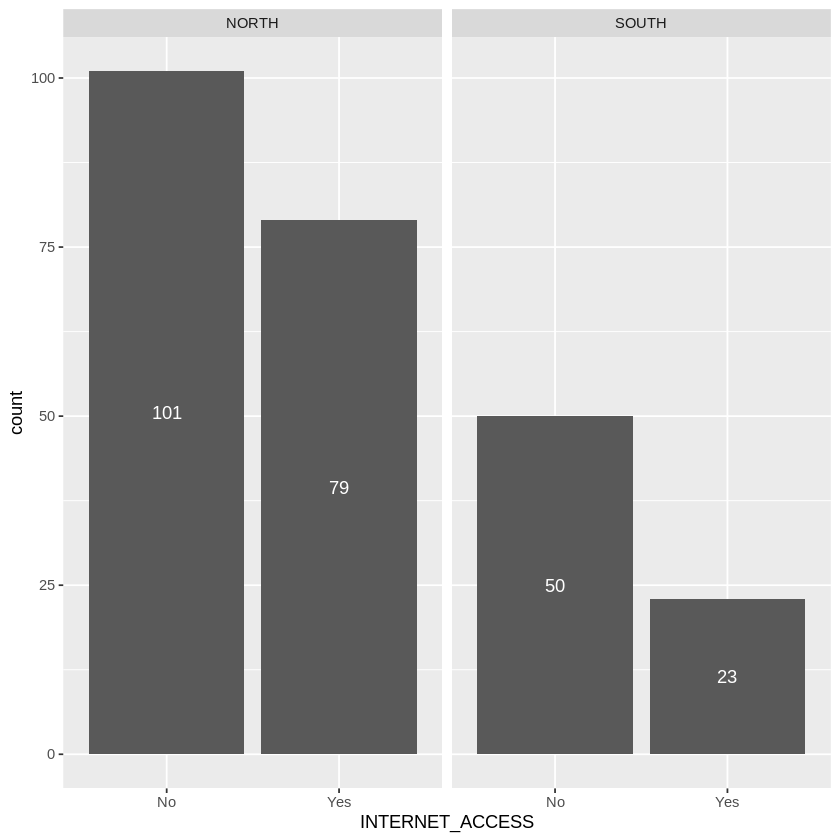

In [81]:
g20 <- df_single_5 %>%
  ggplot(aes(x = INTERNET_ACCESS)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g20 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

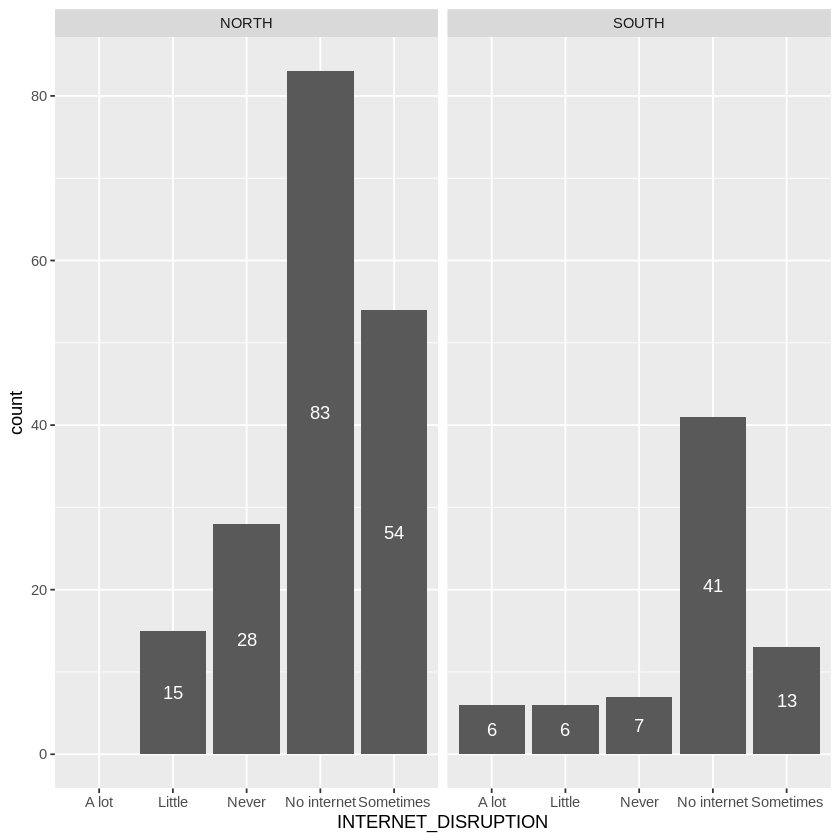

In [82]:
g10 <- df_single_5 %>%
  ggplot(aes(x = INTERNET_DISRUPTION)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

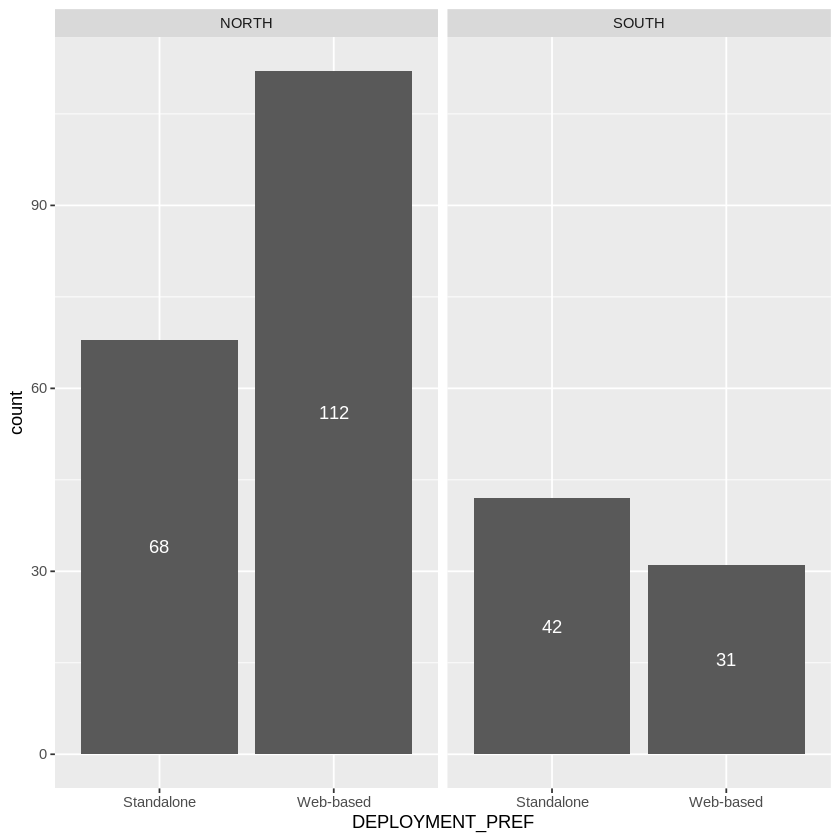

In [83]:
g10 <- df_single_5 %>%
  ggplot(aes(x = DEPLOYMENT_PREF)) + 
  geom_bar() +
  facet_wrap(~ ORG_REGION)

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

In [84]:
glimpse(df_single_5)

Rows: 253
Columns: 24
$ EMP_CODE              <dbl> 33409, 36750, 34729, 33409, 36750, 35918, 36750…
$ ORG_NAME              <chr> "Al syed medical store", "Sohaib Computer", "In…
$ ORG_CITY              <chr> "Islamabad", "Islamabad", "Rawalpindi", "Islama…
$ EMP_PER_OUTLET        <chr> "Less than 5", "Less than 5", "Less than 5", "L…
$ ORG_TYPE              <chr> "Single Outlet", "Single Outlet", "Single Outle…
$ EXPANSION             <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ RECONCILIATION        <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes",…
$ WHY_NO_POS            <chr> "I am happy with how my business is managed pre…
$ LANGUAGE_PREF         <chr> "Both, English & Urdu", "Both, English & Urdu",…
$ PAYMENT_PREF          <chr> "Onetime payment", "Monthly recurring", "Monthl…
$ PAYMENT_AMOUNT        <chr> "(Yearly)", "(Monthly)", "(5000)", "(Na)", "(Mo…
$ INTERNET_ACCESS       <chr> "No", "No", "No", "Yes", "No", "Yes", "No", "No…
$ INTERNET_PROVIDER     <chr> 

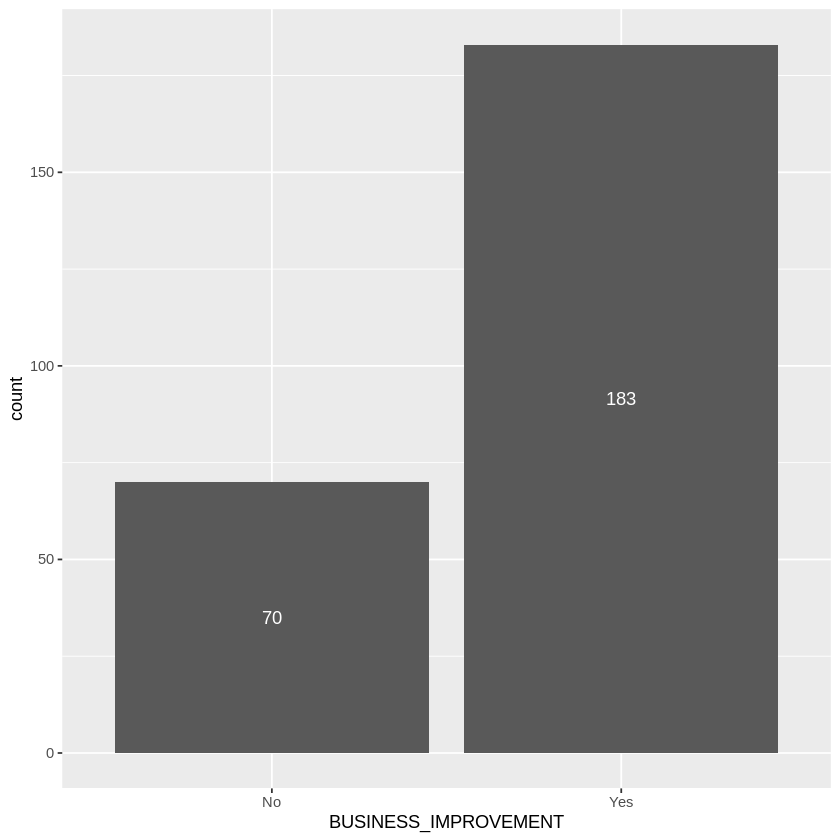

In [85]:
g10 <- df_single_5 %>%
  ggplot(aes(x = BUSINESS_IMPROVEMENT)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

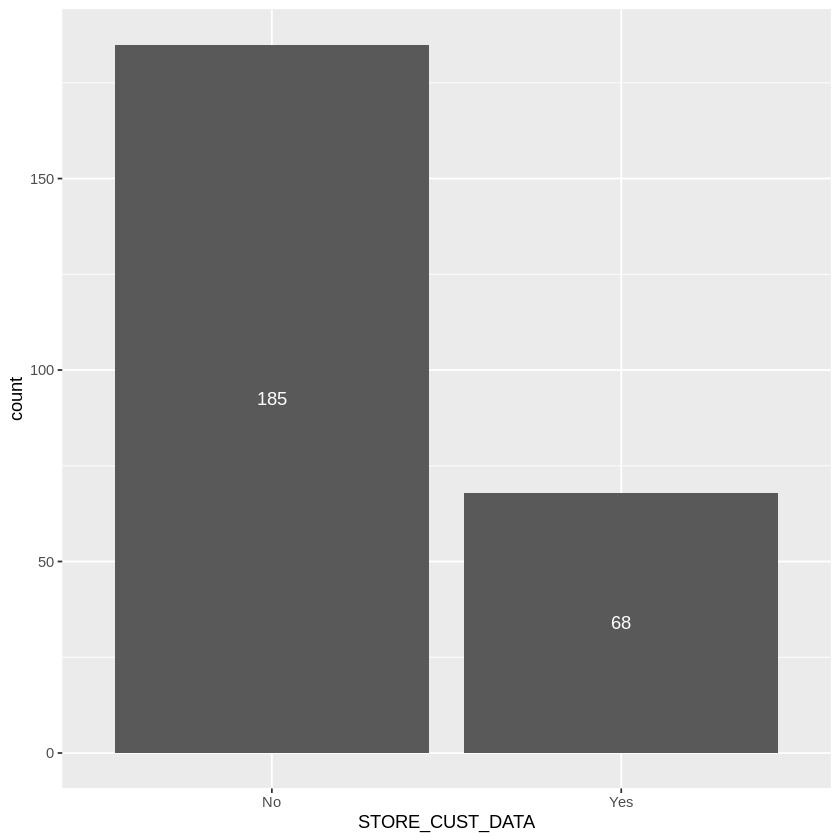

In [86]:
g10 <- df_single_5 %>%
  ggplot(aes(x = STORE_CUST_DATA)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

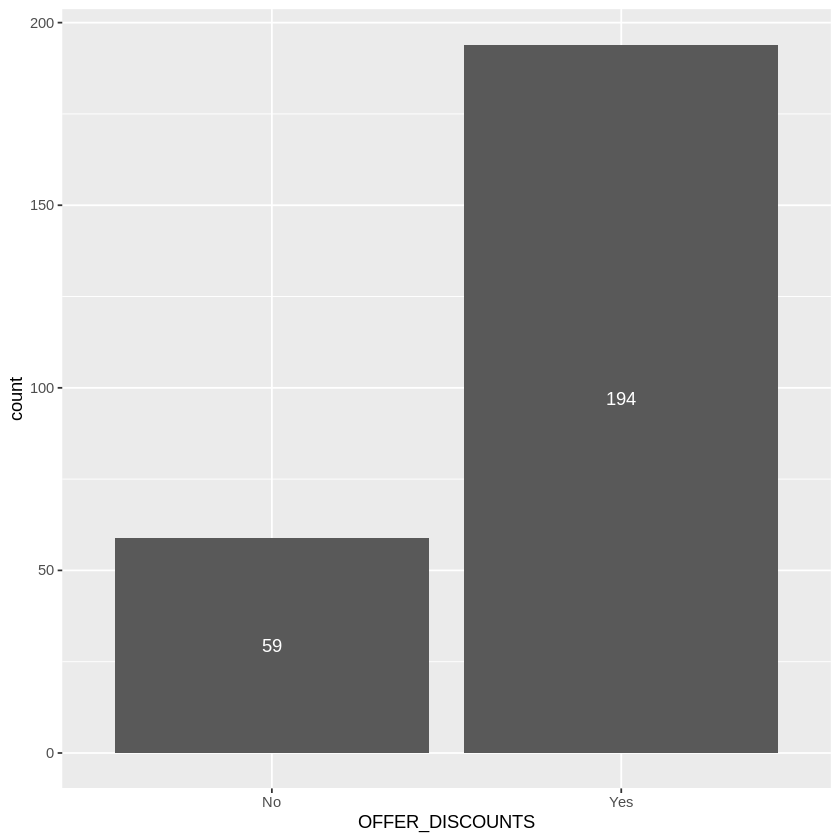

In [87]:
g10 <- df_single_5 %>%
  ggplot(aes(x = OFFER_DISCOUNTS)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs

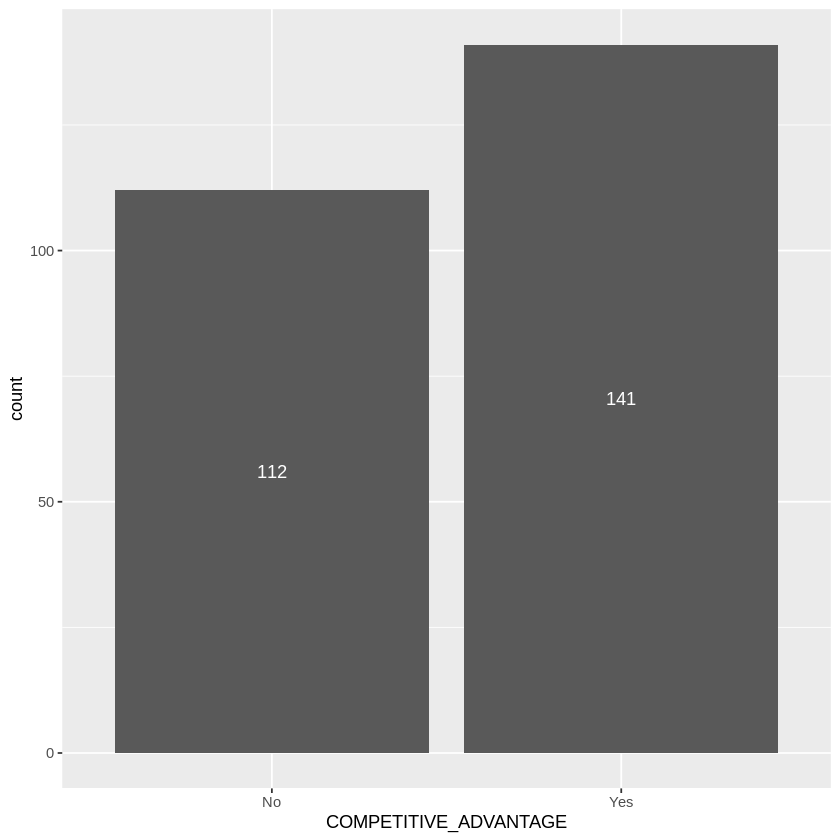

In [88]:
g10 <- df_single_5 %>%
  ggplot(aes(x = COMPETITIVE_ADVANTAGE)) + 
  geom_bar()

p.labs <- g10 + geom_text(aes(label=..count..),stat="count",position=position_stack(0.5),colour='white')
p.labs